## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.  
#Axis 1 is used to indicate we are dropping columns as opposed to rows
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
unique_values_count=application_df.nunique()

unique_values_count


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()

application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced

# use the variable name `application_types_to_replace`
cutoff_value = 16

# Create a list of application types to be replaced based on the cutoff value
application_types_to_replace = application_type[application_type < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()

classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Go back to original Classification count.  If you use the classification_cut, the values that were cut will not
#contain 1 but the CLASSIFICATION still contains 1.  therefore you will end up with all the ones when you 
#do the value counts on the application_df

cutoff_value = 9

classifications_to_replace = classification_count[classification_count < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
Other       80
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
Name: CLASSIFICATION, dtype: int64

In [8]:
application_df.head(13)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [9]:
unique_values_count2=application_df.nunique()

unique_values_count2

APPLICATION_TYPE            13
AFFILIATION                  6
CLASSIFICATION              32
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [10]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [11]:
#convert Special_consideration to 0 (no) and 1 (yes)
application_df['SPECIAL_CONSIDERATIONS'] = application_df['SPECIAL_CONSIDERATIONS'].apply(lambda x: 1 if x=='Y' else 0)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,0,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,0,142590,1


In [12]:
# Look at ASK amount value counts for binning
ask_count = application_df['ASK_AMT'].value_counts()
ask_count


5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [13]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS     int64
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [14]:
# Calculate min, max, mean, and mode of the 'column_name'
min_value = application_df['ASK_AMT'].min()
max_value = application_df['ASK_AMT'].max()
mean_value = application_df['ASK_AMT'].mean()
modes = application_df['ASK_AMT'].mode()

print("Minimum:", min_value)
print("Maximum:", max_value)
print("Mean:", mean_value)
print("Mode(s):", modes)

Minimum: 5000
Maximum: 8597806340
Mean: 2769198.6820607013
Mode(s): 0    5000
Name: ASK_AMT, dtype: int64


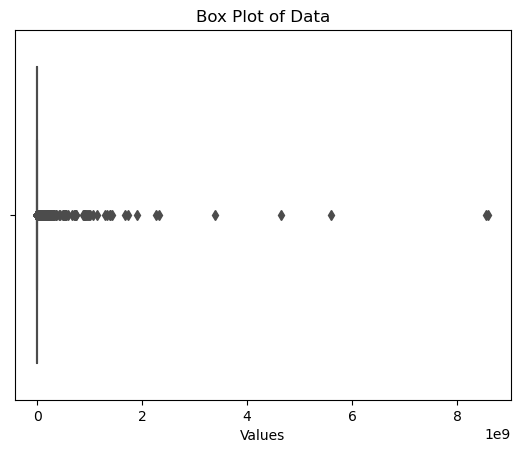

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='ASK_AMT', data=application_df, color='blue')
plt.xlabel('Values')
plt.title('Box Plot of Data')


plt.show()

#this graph indicated that the data should be logarithmic

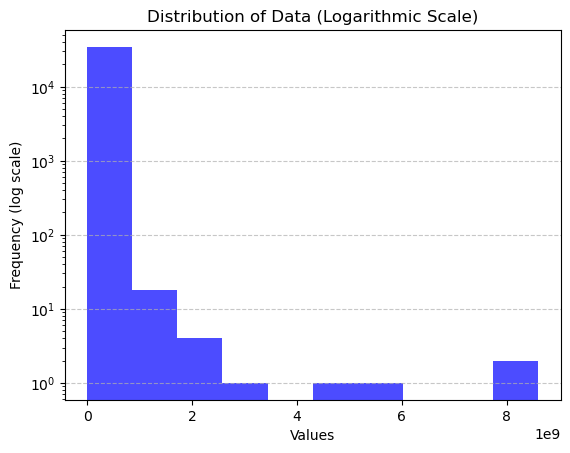

In [16]:
# Create a histogram with a logarithmic scale on the y-axis
plt.hist(application_df['ASK_AMT'], bins=10, log=True, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Data (Logarithmic Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

In [17]:
# Define custom bins for the histogram
custom_bins = [0, 10000, 50000, 100000, 1000000, 10000000]

# Use pd.cut() to convert the data into custom bins
application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=custom_bins, labels=custom_bins[:-1])

# Display the updated DataFrame
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,0,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,0,100000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,0,0,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,0,100000,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,0,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,0,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,0,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,0,0,1


In [18]:
ask_count2 = application_df['ASK_AMT'].value_counts()
ask_count2

0          25947
100000      2954
10000       2398
50000       1423
1000000     1165
Name: ASK_AMT, dtype: int64

In [19]:
unique_values_count3=application_df.nunique()

unique_values_count3

#I've reduced down all of the columns to minimize the different data to simplify the model

APPLICATION_TYPE          13
AFFILIATION                6
CLASSIFICATION            32
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT                    5
IS_SUCCESSFUL              2
dtype: int64

In [20]:
# Convert categorical data to numeric with `pd.get_dummies`

convert_df = pd.get_dummies(application_df, columns=['INCOME_AMT','APPLICATION_TYPE','AFFILIATION','CLASSIFICATION', 'USE_CASE',
                                                    'ORGANIZATION'])
convert_df

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,100000,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,100000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
34295,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
34296,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
34297,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [21]:
# Split our preprocessed data into our features and target arrays Targets = IS_SUCCESSFUL
y = convert_df['IS_SUCCESSFUL'].values

#drop the IS_SUCCESSFUL column from the convert_df and name this dataframe X
col_to_drop = ['IS_SUCCESSFUL']

X = convert_df.drop(col_to_drop, axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [22]:
y[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [23]:
X.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,100000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,100000,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
import numpy as np

#check the balance
target_values, counts = np.unique(y, return_counts=True)

for value, count in zip(target_values, counts):
    print(f"Value: {value}, Count: {count}")

#not completetly balanced but not too far off

Value: 0, Count: 16038
Value: 1, Count: 18261


In [25]:
# Import the RandomOverSampler module form imbalanced-learn
#from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
#ros = RandomOverSampler(sampling_strategy='auto', random_state=1)

# Fit the original training data to the random_oversampler model
#X_resampled, y_resampled = ros.fit_resample(X, y)

# Count the distinct values of the resampled labels data
#target_ros, counts = np.unique(y_resampled, return_counts=True)

#for value, count in zip(target_ros, counts):
    #print(f"Value: {value}, Count: {count}")

In [26]:
#X_resampled, y_resampled = ros.fit_resample(X, y)



In [27]:

# Split the preprocessed data into a training and testing dataset
#X_train, X_test, y_train, y_test =  train_test_split(X_resampled, y_resampled, random_state=42)

In [28]:
X_train.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
15029,1,0,1000000,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
22784,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
13575,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
22153,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17052,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 18
hidden_nodes_layer2 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                1314      
                                                                 
 dense_1 (Dense)             (None, 2)                 38        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1355 (5.29 KB)
Trainable params: 1355 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [32]:
# Train the model


# Define a callback to save the model's weights every five epochs
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',  # Filepath to save the weights
    save_weights_only=True,       # Only save the weights, not the entire model
    save_best_only=False,         # Save the weights every five epochs
    save_freq=5                      # Save every five epochs
)

#Train the Model
history = nn.fit(
    X_train, y_train,
    epochs=28,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback])  




Epoch 1/28
804/804 [==============================] - 4s 4ms/step - loss: 0.6197 - accuracy: 0.6747 - val_loss: 0.6156 - val_accuracy: 0.6976
Epoch 2/28
804/804 [==============================] - 3s 4ms/step - loss: 0.6024 - accuracy: 0.7003 - val_loss: 0.6000 - val_accuracy: 0.6973
Epoch 3/28
804/804 [==============================] - 3s 4ms/step - loss: 0.5966 - accuracy: 0.6993 - val_loss: 0.5964 - val_accuracy: 0.6981
Epoch 4/28
804/804 [==============================] - 3s 4ms/step - loss: 0.5936 - accuracy: 0.6996 - val_loss: 0.6020 - val_accuracy: 0.6917
Epoch 5/28
804/804 [==============================] - 3s 4ms/step - loss: 0.5927 - accuracy: 0.7003 - val_loss: 0.5937 - val_accuracy: 0.6978
Epoch 6/28
804/804 [==============================] - 3s 4ms/step - loss: 0.5916 - accuracy: 0.7002 - val_loss: 0.5931 - val_accuracy: 0.6960
Epoch 7/28
804/804 [==============================] - 3s 4ms/step - loss: 0.5905 - accuracy: 0.7005 - val_loss: 0.5913 - val_accuracy: 0.6996
Epoch 

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6526 - accuracy: 0.7005 - 429ms/epoch - 2ms/step
Loss: 0.6525844931602478, Accuracy: 0.7005248069763184


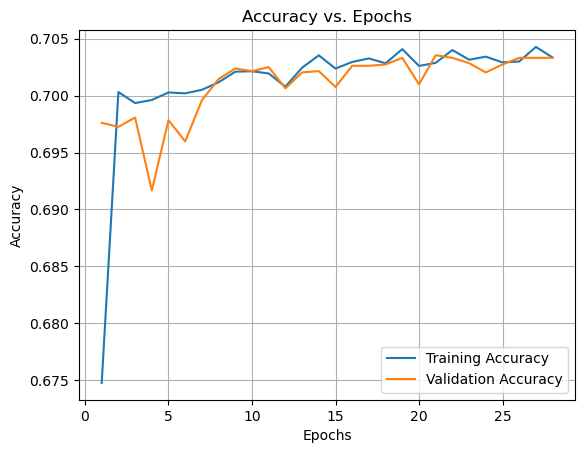

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(history.history)  # Use 'history.history'

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Create a list of epoch numbers 
epochs = range(1, len(history_df) + 1)

# Add the 'epochs' column to the DataFrame
history_df['epochs'] = epochs

# Plot the accuracy
plt.plot(history_df['epochs'], history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['epochs'], history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()  # Add a legend to differentiate between training and validation accuracy
plt.grid(True)

plt.show()

In [35]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')